Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA PREPROCESSING

In [3]:
data = pd.DataFrame(data,columns=['age','sex','bmi','children','smoker','region','charges'])

data['charges'] = data['charges'].astype(int)

In [4]:
print(data)
print(data.dtypes)

      age     sex     bmi  children smoker     region  charges
0      19  female  27.900         0    yes  southwest    16884
1      18    male  33.770         1     no  southeast     1725
2      28    male  33.000         3     no  southeast     4449
3      33    male  22.705         0     no  northwest    21984
4      32    male  28.880         0     no  northwest     3866
...   ...     ...     ...       ...    ...        ...      ...
1333   50    male  30.970         3     no  northwest    10600
1334   18  female  31.920         0     no  northeast     2205
1335   18  female  36.850         0     no  southeast     1629
1336   21  female  25.800         0     no  southwest     2007
1337   61  female  29.070         0    yes  northwest    29141

[1338 rows x 7 columns]
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges       int64
dtype: object


In [6]:
cols = []
for col in data.columns:
    if(data[col].dtype == np.int64 or data[col].dtype == np.float64):
        cols.append(col)
cols

['age', 'bmi', 'children', 'charges']

Text(0.5, 1.0, 'charges')

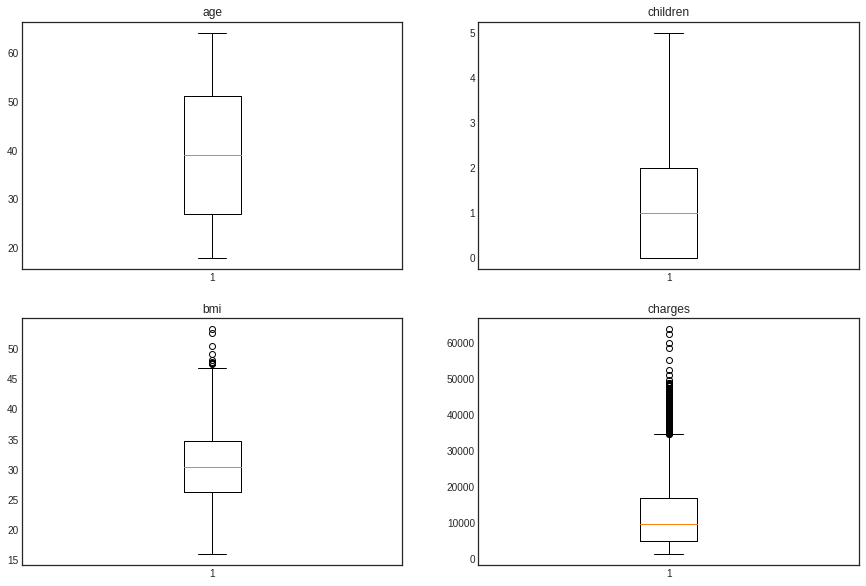

In [5]:
# find the outlier data 
def find_outlier(column):
    number_cols_ph = data[column].count()
    first_quartile = np.quantile(data[column], 0.25)
    third_quartile = np.quantile(data[column], 0.75)
    IQR = third_quartile - first_quartile
    min_outlier = first_quartile - (1.5 * IQR)
    max_outlier = third_quartile + (1.5 * IQR)
    print(f'the data less than {min_outlier} and more than {max_outlier} is the outlier data in colunm {column}')
    return min_outlier, max_outlier

    # remove the outlier data 
def remove_outlier(column):
    min_outlier, max_outlier = find_outlier(column)
    count_min = data[column].loc[data[column]<min_outlier].count()
    count_max = data[column].loc[data[column]>max_outlier].count()
    data[column].loc[data[column]<min_outlier] = np.nan
    data[column].loc[data[column]>max_outlier] = np.nan
    count = count_min + count_max
    return count

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data['charges'])
ax.set_title('charges')

IQR untuk BMI

Text(0.5, 1.0, 'charges')

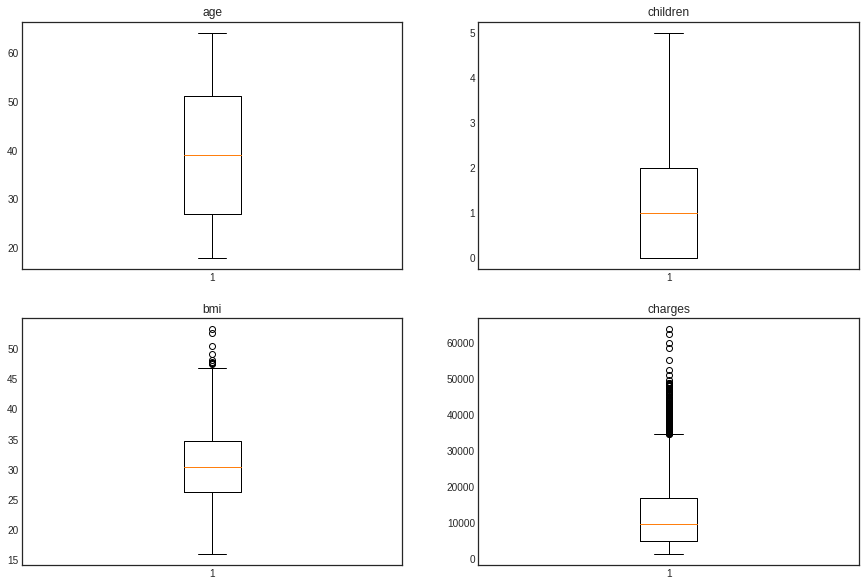

In [7]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['bmi']>=Q1-1.5*IQR) & (data['bmi']<=Q3 + 1.5*IQR)
data_filtered=data.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data['charges'])
ax.set_title('charges')

Text(0.5, 1.0, 'charges')

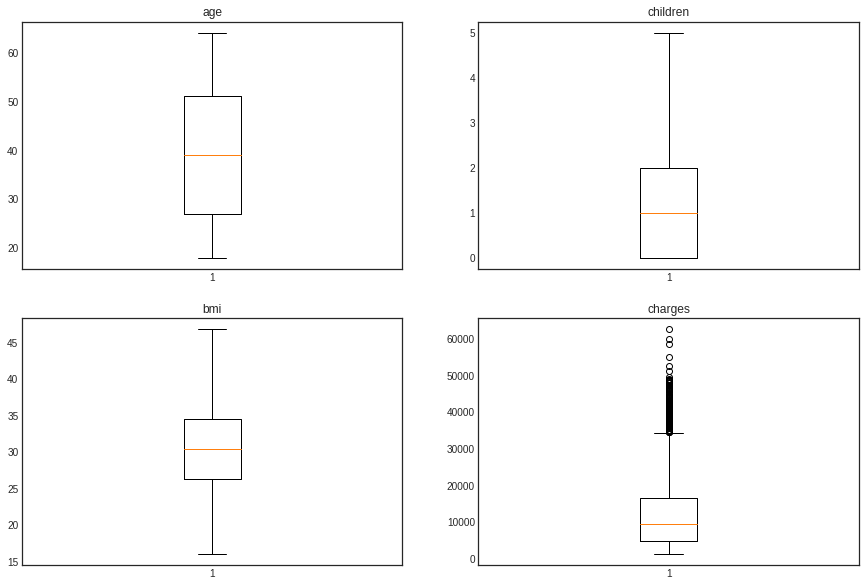

In [8]:
Q1 = data_filtered['bmi'].quantile(0.25)
Q3 = data_filtered['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered['bmi']>=Q1-1.5*IQR) & (data_filtered['bmi']<=Q3 + 1.5*IQR)
data_filtered2=data_filtered.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered2['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered2['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered2['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered2['charges'])
ax.set_title('charges')

IQR untuk Charges

Text(0.5, 1.0, 'charges')

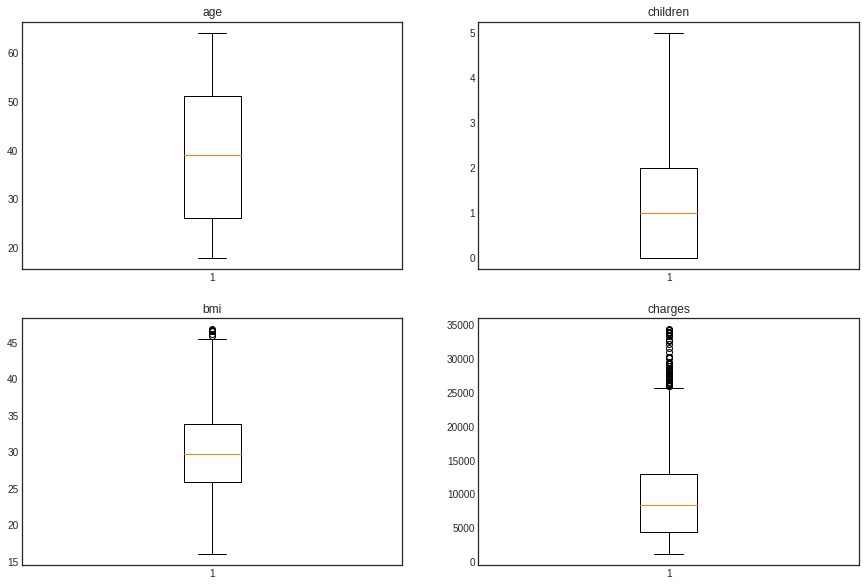

In [9]:
#ke 1
Q1 = data_filtered2['charges'].quantile(0.25)
Q3 = data_filtered2['charges'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered2['charges']>=Q1-1.5*IQR) & (data_filtered2['charges']<=Q3 + 1.5*IQR)
data_filtered3=data_filtered2.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered3['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered3['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered3['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered3['charges'])
ax.set_title('charges')

Text(0.5, 1.0, 'charges')

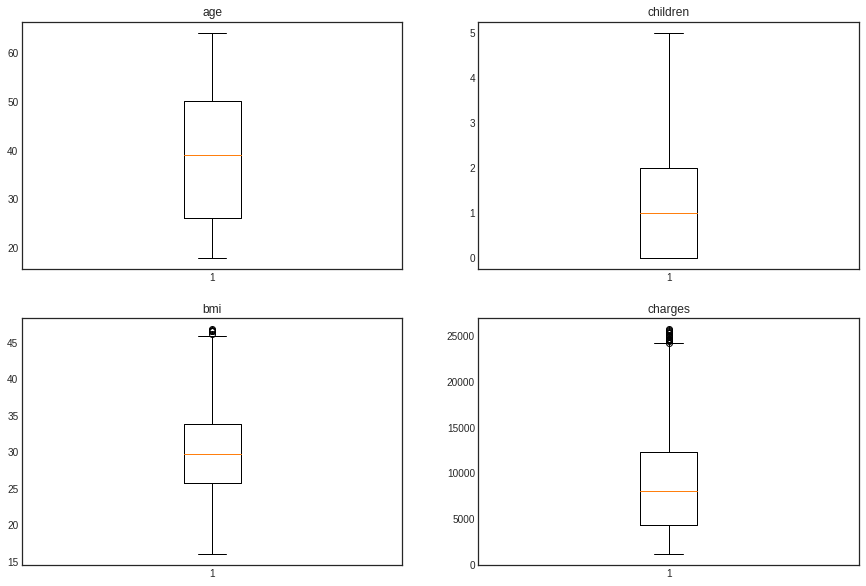

In [10]:
#ke 2
Q1 = data_filtered3['charges'].quantile(0.25)
Q3 = data_filtered3['charges'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered3['charges']>=Q1-1.5*IQR) & (data_filtered3['charges']<=Q3 + 1.5*IQR)
data_filtered4=data_filtered3.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered4['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered4['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered4['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered4['charges'])
ax.set_title('charges')

Text(0.5, 1.0, 'charges')

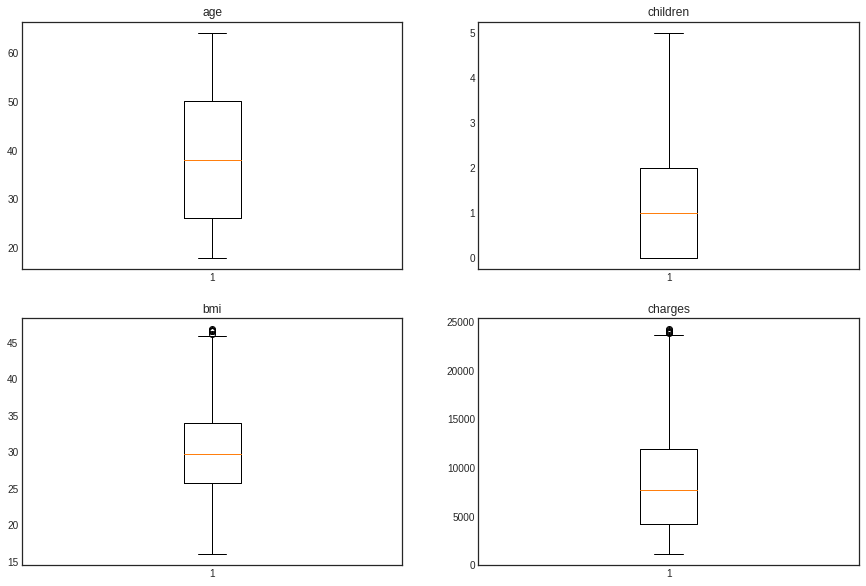

In [11]:
#ke 3
Q1 = data_filtered4['charges'].quantile(0.25)
Q3 = data_filtered4['charges'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered4['charges']>=Q1-1.5*IQR) & (data_filtered4['charges']<=Q3 + 1.5*IQR)
data_filtered5=data_filtered4.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered5['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered5['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered5['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered5['charges'])
ax.set_title('charges')

Text(0.5, 1.0, 'charges')

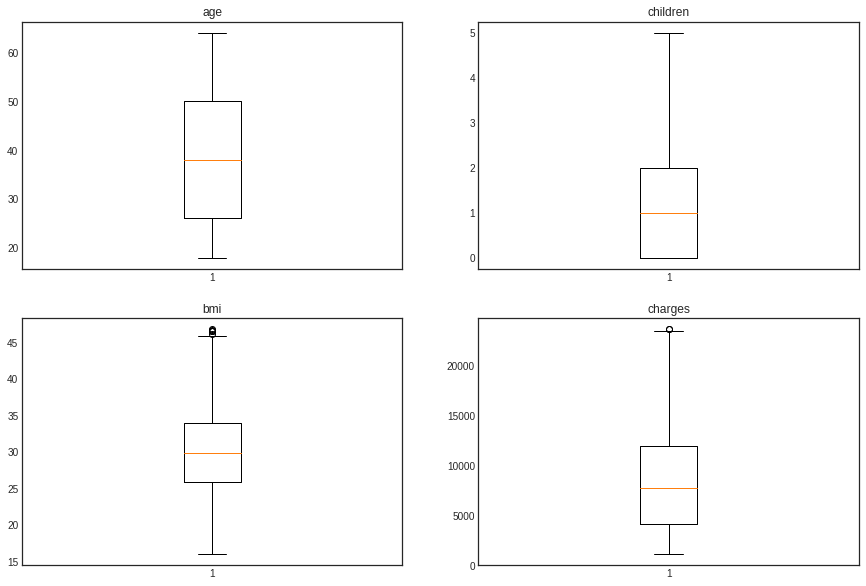

In [12]:
#ke 4
Q1 = data_filtered5['charges'].quantile(0.25)
Q3 = data_filtered5['charges'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered5['charges']>=Q1-1.5*IQR) & (data_filtered5['charges']<=Q3 + 1.5*IQR)
data_filtered6=data_filtered5.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered6['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered6['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered6['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered6['charges'])
ax.set_title('charges')

Text(0.5, 1.0, 'charges')

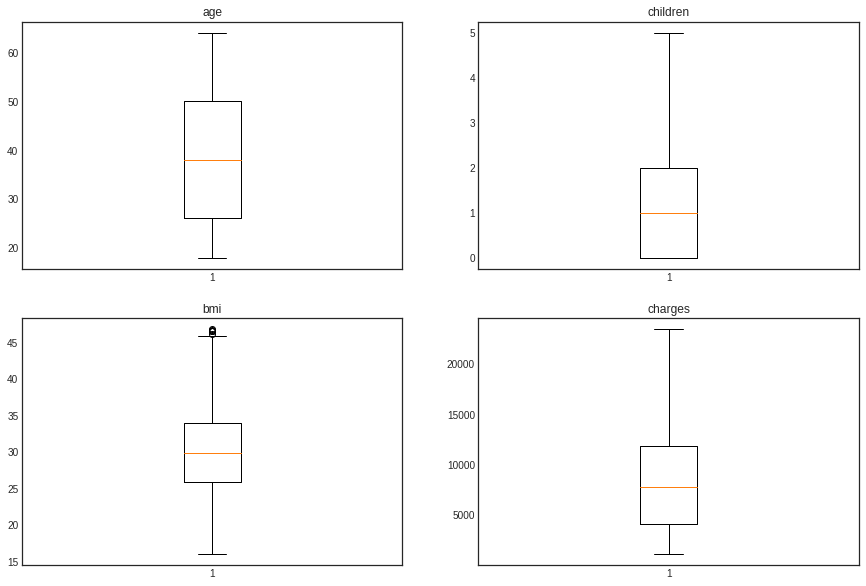

In [13]:
#ke 5
Q1 = data_filtered6['charges'].quantile(0.25)
Q3 = data_filtered6['charges'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered6['charges']>=Q1-1.5*IQR) & (data_filtered6['charges']<=Q3 + 1.5*IQR)
data_filtered7=data_filtered6.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered7['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered7['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered7['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered7['charges'])
ax.set_title('charges')

IQR untuk BMI kedua kalinya

Text(0.5, 1.0, 'charges')

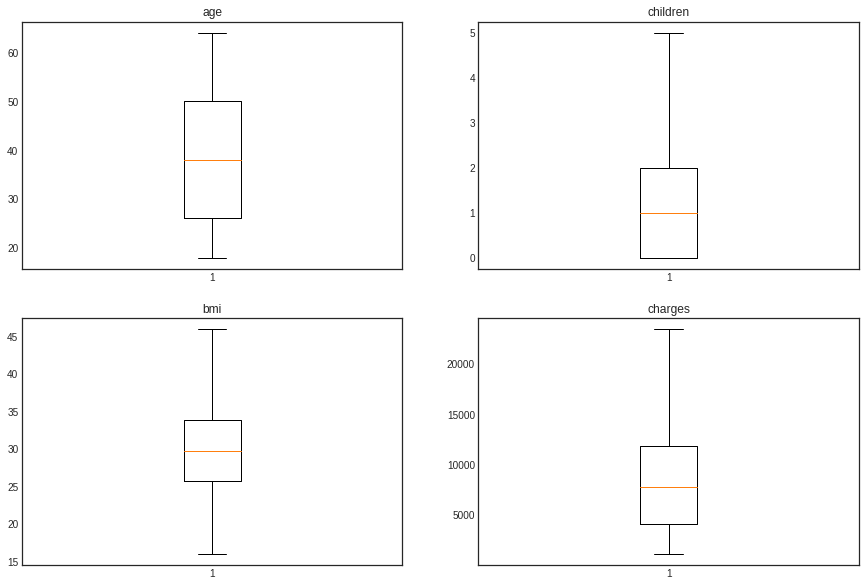

In [14]:
Q1 = data_filtered7['bmi'].quantile(0.25)
Q3 = data_filtered7['bmi'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_filtered7['bmi']>=Q1-1.5*IQR) & (data_filtered7['bmi']<=Q3 + 1.5*IQR)
data_filtered8=data_filtered7.loc[filter]

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered8['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(data_filtered8['children'])
ax.set_title('children')
ax=plt.subplot(223)
plt.boxplot(data_filtered8['bmi'])
ax.set_title('bmi')
ax=plt.subplot(224)
plt.boxplot(data_filtered8['charges'])
ax.set_title('charges')

## EXPLORATORY DATA

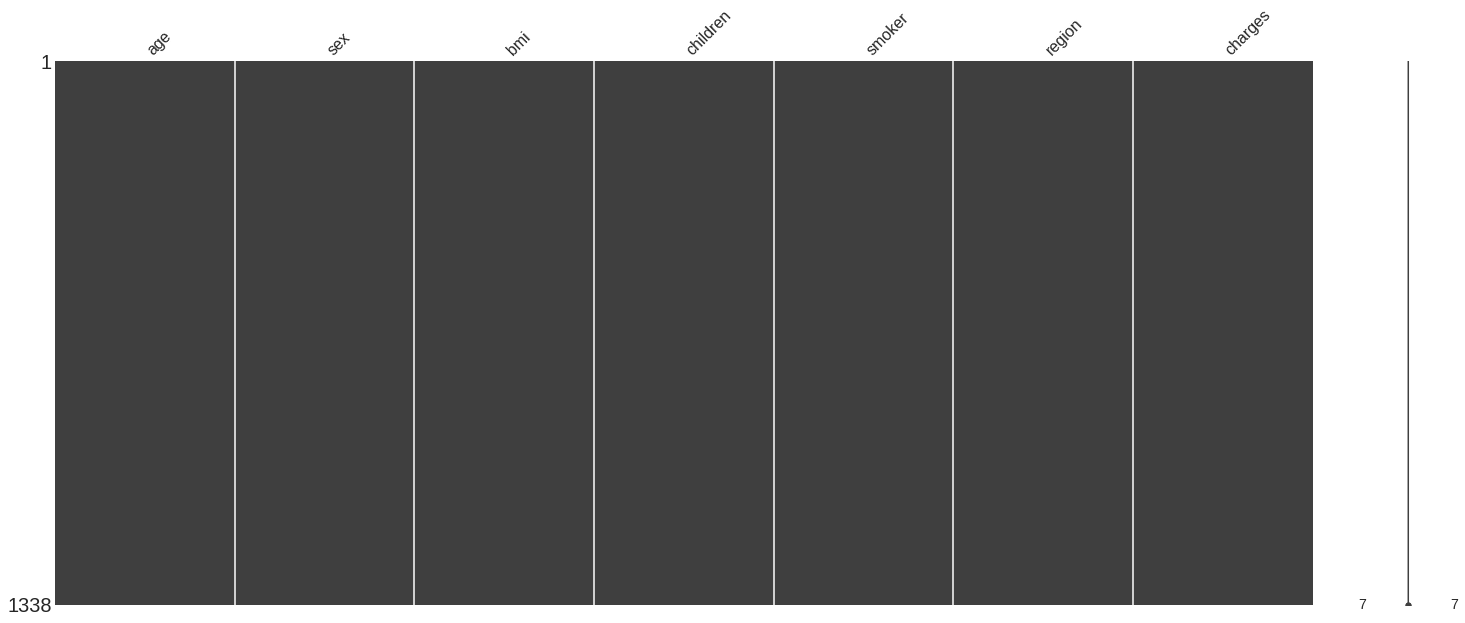

In [15]:
import missingno as msno
msno.matrix(data)

In [16]:
data.dropna(inplace=True)

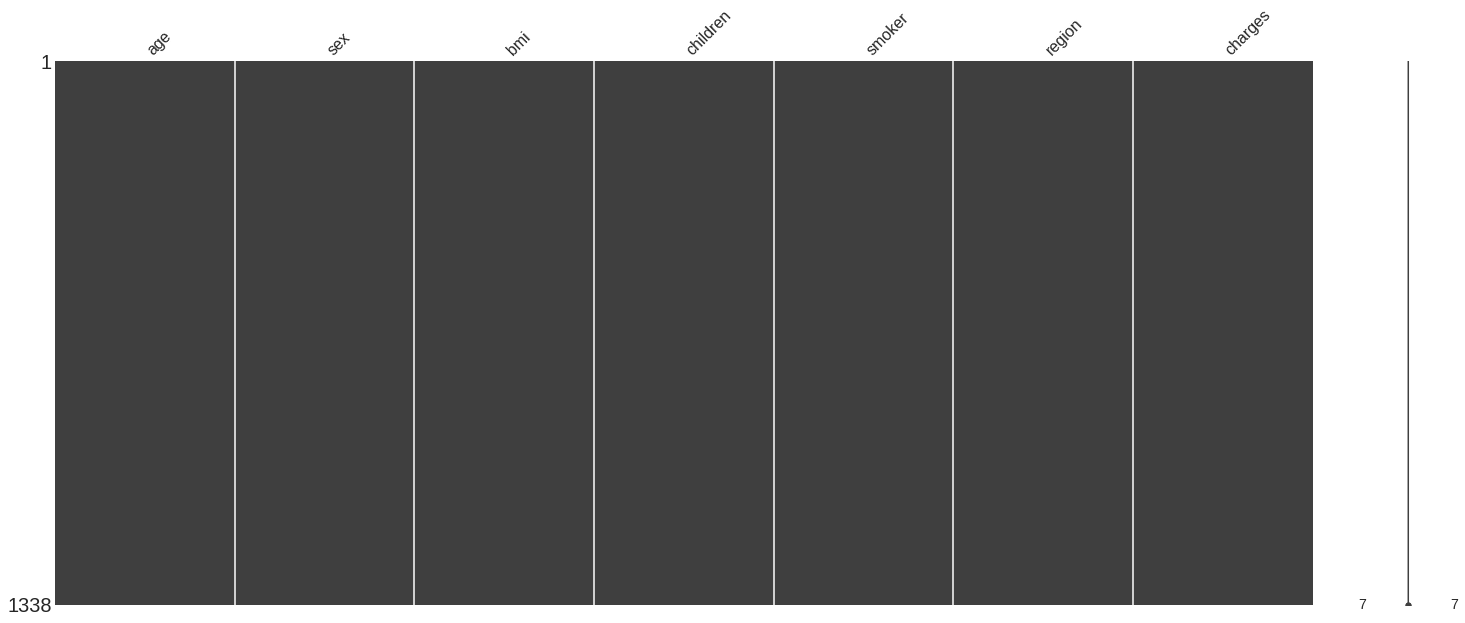

In [17]:
import missingno as msno
msno.matrix(data)

## DATA CLEANING

Data Null

In [18]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
data.dropna(inplace=True)

Data Duplicate

In [20]:
data.duplicated().sum()

1

In [21]:
data.drop_duplicates(inplace=True)

Distribution Of Region

In [22]:
region_data_proportion = data['region'].value_counts()

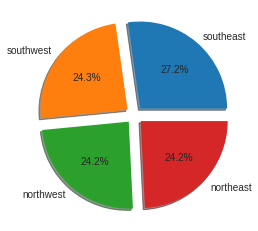

In [23]:
myexplode = [0.1, 0.1, 0.1, 0.1]
plt.pie(region_data_proportion, labels=region_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True)
plt.show()

Distribution of Smoker

In [24]:
smoker_data_proportion = data['smoker'].value_counts()

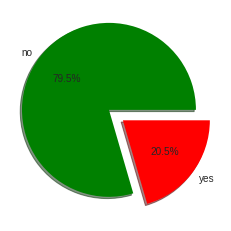

In [25]:
myexplode = [0.1, 0.1]
plt.pie(smoker_data_proportion, labels=smoker_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True, colors=['green','red'])
plt.show()

Distribution of Sex

In [26]:
sex_data_proportion = data['sex'].value_counts()

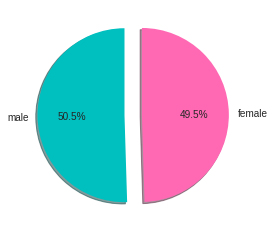

In [27]:
myexplode = [0.1, 0.1]
plt.pie(sex_data_proportion, labels=sex_data_proportion.index, autopct='%1.1f%%', startangle =90, explode= myexplode, shadow = True, colors=['c','hotpink'])
plt.show()

Count of Smokers by Sex and Region

In [28]:
data.groupby(['region', 'sex'])['smoker'].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      160
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: smoker, dtype: int64

In [29]:
pd.crosstab(index=data.region, columns=data.sex, values=data.smoker, aggfunc='count')

sex,female,male
region,,
northeast,161,163
northwest,164,160
southeast,175,189
southwest,162,163


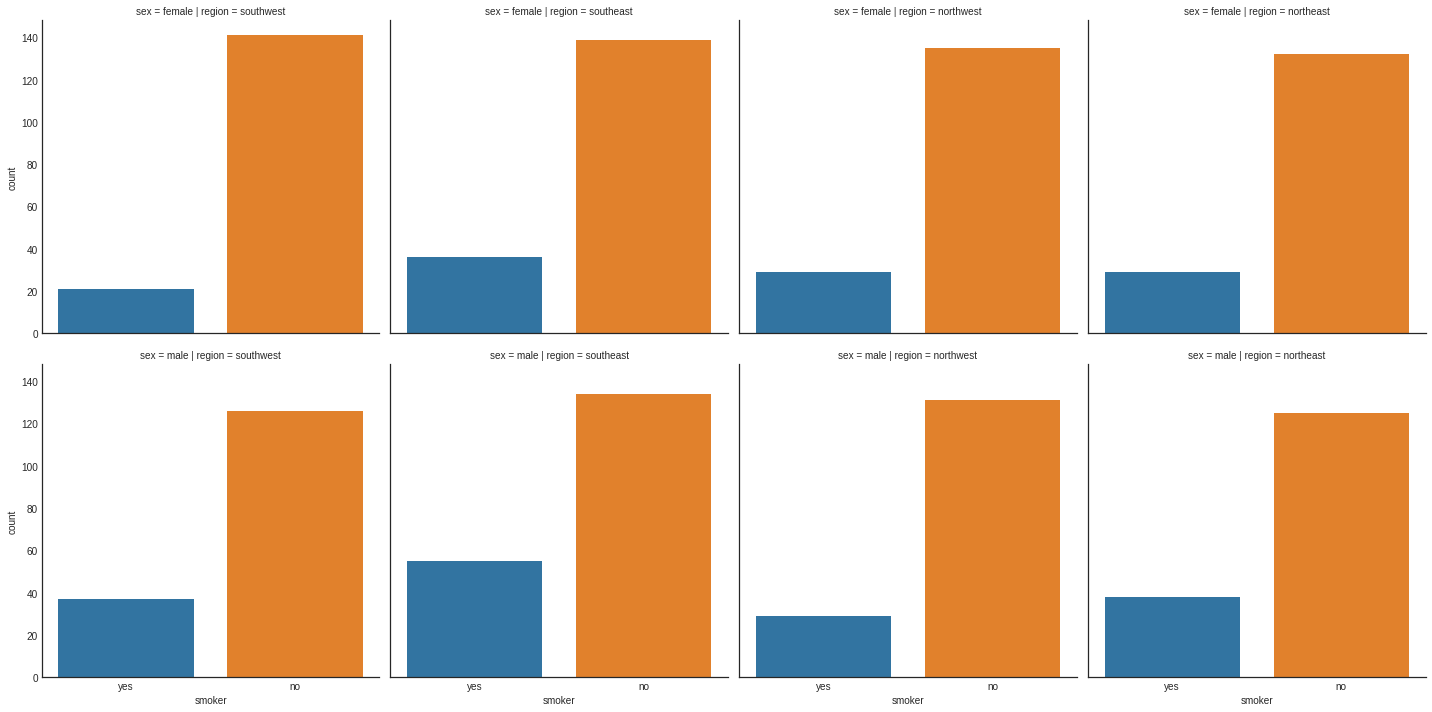

In [30]:
sns.catplot(row='sex', x='smoker', col='region', data=data, kind='count')

Distribution of age by smokers

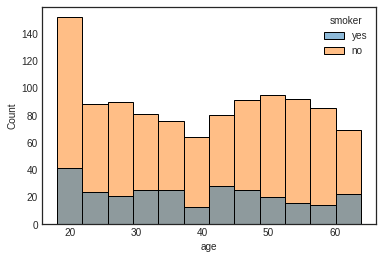

In [31]:
sns.histplot(x='age', hue='smoker',data=data)

Distribution of age by smokers and Sex

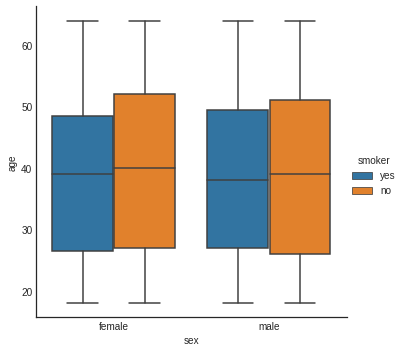

In [32]:
sns.catplot(y='age', x='sex', hue='smoker', kind='box', data=data)
plt.show()

Distribution of age by Children and Sex

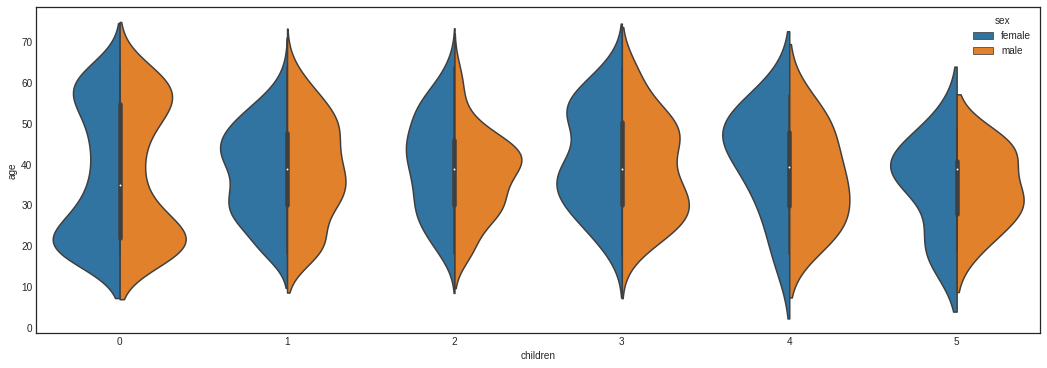

In [33]:
plt.figure(figsize=(18,6))
sns.violinplot(x=data_filtered8.children, y=data_filtered8.age, hue=data_filtered8.sex, split=True)
plt.show()

Machine Learning

In [34]:
data_filtered8.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866


In [35]:
data_ml = data_filtered8.copy()

Encoder Columns from Categorical to Numerical

In [36]:
lb_encoder = LabelEncoder()
data_ml['sex'] = lb_encoder.fit_transform(data_ml.sex)
data_ml['smoker'] = lb_encoder.fit_transform(data_ml.smoker)
data_ml['region'] = lb_encoder.fit_transform(data_ml.region)

In [37]:
data_ml

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411
1333,50,1,30.970,3,0,1,10600
1334,18,0,31.920,0,0,0,2205
1335,18,0,36.850,0,0,2,1629


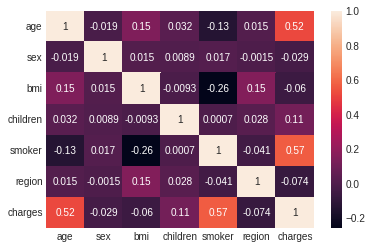

In [38]:
sns.heatmap(data_ml.corr(), annot=True)

Data Slicing

In [39]:
X = data_ml.iloc[:, :-1].values
y = data_ml.iloc[:, -1].values

Train and Test the Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=98)

Linear Regression Model

In [41]:
model_lg = LinearRegression()
model = model_lg.fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_test)

In [43]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
0,9541,10944.922745
1,5028,6702.900936
2,8891,9796.719368
3,11085,11437.216881
4,12622,12181.714142
...,...,...
327,5693,6585.135302
328,12105,11751.120060
329,19144,9978.828131
330,14474,13357.792746


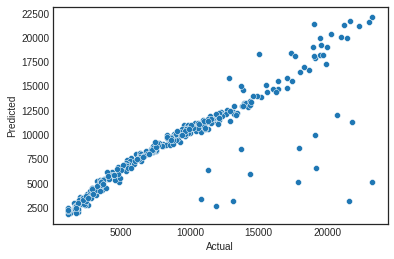

In [44]:
sns.scatterplot(x=results.Actual, y=results.Predicted)

Evaluation the Model

In [45]:
print(model.score(X_test, y_test)*100) 
print(model.score(X_train, y_train)*100) 

78.51048798957467
65.97271045036666


In [46]:
r2_score(y_test, y_pred)*100

78.51048798957467

Cross Validation

In [47]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, y, cv = k_folds)

print("Average CV Score: ", scores.mean()*100)

Average CV Score:  69.78468051219345


Comparing between actual values and predict values by plotting

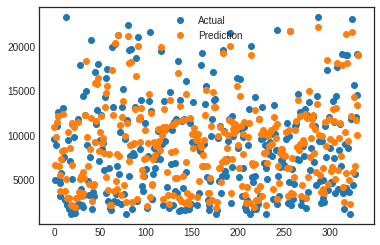

In [48]:
plt.plot(y_test, 'o', label='Actual')
plt.plot(y_pred, 'o', label='Prediction')
plt.legend()
plt.show()

In [ ]:
from google.colab import files

data.to_csv('insurance.csv', encoding = 'utf-8-sig')
files.download('insurance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>